In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import os

In [8]:
import spacy
import re
# import pyvis
import networkx as nx
import matplotlib.pyplot as plt
from spacy import displacy
# import community as community_louvain
nlp = spacy.load("en_core_web_sm")


D:\anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


## Read data

In [2]:
for dirname, _, filenames in os.walk('HarryPotter'):
    print(_)
    for filename in filenames:
        print(os.path.join(dirname, filename))

[]
HarryPotter\1.csv
HarryPotter\Book1.txt
HarryPotter\Book2.txt
HarryPotter\Book3.txt
HarryPotter\Book4.txt
HarryPotter\Book5.txt
HarryPotter\Book6.txt
HarryPotter\Book7.txt
HarryPotter\characters_list.csv
HarryPotter\harrypotterkgdata.csv
HarryPotter\translatedCSV.csv


In [3]:
from dataclasses import dataclass

@dataclass
class Book:
    book: str
    text: str
        
bookList = ["Book1","Book2", "Book3","Book4","Book5", "Book6", "Book7"]
bookdata= []
for b in bookList:
    bookdata.append(Book(book = b,text = open("HarryPotter/"+b+".txt", encoding='utf-8').read()))

## Pre-processed text

In [83]:
for book in bookdata:
    book.text = re.sub(r"\n","",book.text)
    print(len(book.text))

459169
514948
655473
1149706
1559298
1026630
1188915


In [84]:
bookdata[0].text = re.sub(r"Page \| \d+ Harry Potter and the Philosophers Stone - J.K. Rowling","",bookdata[0].text)
bookdata[1].text = re.sub(r"Page \| \d+ Harry Potter and the Chamber of Secrets - J.K. Rowling","",bookdata[1].text)
bookdata[2].text = re.sub(r"Page \| \d+ Harry Potter and the Prisoner of Azkaban - J.K. Rowling","",bookdata[2].text)
bookdata[3].text = re.sub(r"Page \| \d+ Harry Potter and the Goblet of Fire - J.K. Rowling","",bookdata[3].text)
bookdata[4].text = re.sub(r"Page \| \d+ Harry Potter and the Order of the Phoenix - J.K. Rowling","",bookdata[4].text)
bookdata[5].text = re.sub(r"Page \| \d+ Harry Potter and the Half Blood Prince - J.K. Rowling","",bookdata[5].text)
bookdata[6].text = re.sub(r"Page \| \d+ Harry Potter and the Deathly Hallows - J.K. Rowling","",bookdata[6].text)

In [85]:
for book in bookdata:
    print(len(book.text))

437433
490742
623503
1101916
1555342
981860
1137124


In [ ]:
def pipeline(text):
    doc = nlp(text)

## Splitting sentences and extracting entities.

In [87]:
nlp.max_length = 6327920

In [88]:
doc1 = nlp(all_book)
# displacy.render(doc[:200],style="ent",jupyter = True)

In [89]:
doc = doc1

In [90]:
for sent in doc.sents:
     print(sent)

/ THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.
They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.
Mr. Dursley was the director of a firm called Grunnings, which made drills.
He was a big, beefy man with hardly any neck, although he did have a very large mustache.
Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.
The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere.
The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.
They didn’t think they could bear it if anyone found out about the Potters.
Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t 

Harry’s partner was Seamus Finnigan (which was a relief, because Neville had been trying to catch his eye).
Ron, however, was to be working with Hermione Granger.
It was hard to tell whether Ron or Hermione was angrier about this.
She hadn’t spoken to either of them since the day Harry’s broomstick had arrived.
“Now, don’t forget that nice wrist movement we’ve been practicing!” squeaked Professor Flitwick, perched on top of his pile of books as usual.
“Swish and flick, remember, swish and flick.
And saying the magic words properly is very important, too — never  forget Wizard Baruffio, who said ‘s’ instead of ‘f and found himself on the floor with a buffalo on his chest.”
It was very difficult.
Harry and Seamus swished and flicked, but the feather they were supposed to be sending skyward just lay on the desktop.
Seamus got so impatient that he prodded it with his wand and set fire to it — Harry had to put it out with his hat.
Ron, at the next table, wasn’t having much more luck.
“Winga

Then the Dursleys appeared and Dudley rattled the bars of the cage, laughing at him.
“Stop it,” Harry muttered as the rattling pounded in his sore head.
“Leave me alone ... cut it out ...
I’m trying to sleep. ...”
He opened his eyes.
Moonlight was shining through the bars on the window.
And someone was goggling through the bars at him: a freckle-faced, red-haired, long-nosed someone.
Ron Weasley was outside Harry’s window.
 3 THE BURROW “Ron\” breathed Harry, creeping to the window and pushing it up so they could talk through the bars.
“Ron, how did you — What the — ?”
Harry’s mouth fell open as the full impact of what he was seeing hit him.
Ron was leaning out of the back window of an old turquoise car, which was parked in midair.
Grinning at Harry from the front seats were Fred and George, Ron’s elder twin brothers.
“All right, Harry?” asked George.
“What’s been going on?” said Ron.
“Why haven’t you been answering my letters?
I’ve asked you to stay about twelve times, and then Dad ca

“That was the one I burped slugs all over.
If you’d wiped slime off a name for an hour, you’d remember it, too.”
Harry peeled the wet pages apart.
They were completely blank.
There wasn’t the faintest trace of writing on any of them, not even Auntie Mabel’s birthday, or dentist, half-past three.
“He never wrote in it,” said Harry, disappointed.
“I wonder why someone wanted to flush it away?” said Ron curiously.
Harry turned to the back cover of the book and saw the printed name of a variety store on Vauxhall Road, London.
“He must’ve been Muggle-born,” said Harry thoughtfully.
“To have bought a diary from Vauxhall Road. ...”
“Well, it’s not much use to you,” said Ron.
He dropped his voice.
“Fifty points if you can get it through Myrtle’s nose.”
Harry, however, pocketed it.
Hermione left the hospital wing, de-whiskered, tail- less, and fur-free, at the beginning of February.
On her first evening back in Gryffindor Tower, Harry showed her T. M. Riddle’s diary and told her the story of ho

So Sirius Black was after him.
This explained everything.
Fudge had been lenient with him because he was so relieved to find him alive.
He’d made Harry promise to stay in Diagon Alley where there were plenty of wizards to keep an eye on him.
And he was sending two Ministry cars to take them all to the station tomorrow, so that the Weasleys could look after Harry until he was on the train.
Harry lay listening to the muffled shouting next door and wondered why he didn’t feel more scared.
Sirius Black had murdered thirteen people with one curse; Mr. and Mrs. Weasley obviously thought Harry would be panic-stricken if he knew the truth.
But Harry happened to agree wholeheartedly with Mrs. Weasley that the safest place on earth was wherever Albus Dumbledore happened to be.
Didn’t people always say  that Dumbledore was the only person Lord Voldemort had ever been afraid of?
Surely Black, as Voldemort’s right-hand man, would be just as frightened of him?
And then there were these Azkaban guard

“Nothing — I mean, I just knew they were friends at Hogwarts too. ...”
Lupin’s face relaxed.
“Yes, I knew him,” he said shortly.
“Or I thought I did.
You’d better be off, Harry, it’s getting late.”
Harry left the classroom, walking along the corridor and around a corner, then took a detour behind a suit of armor and sank down on its plinth to finish his chocolate, wishing he hadn’t mentioned Black, as Lupin was obviously not keen on the subject.
Then Harry’s thoughts wandered back to his mother and father. ...
He felt drained and strangely empty, even though he was so full of chocolate.
Terrible though it was to hear his parents’ last moments replayed inside his head, these were the only times Harry had heard their voices since he was a very small child.
But he’d never be able to produce a proper Patronus if he half wanted to hear his parents again. ...
 “They’re dead,” he told himself sternly.
“They’re dead and listening to echoes of them won’t bring them back.
You’d better get a grip

“You’d better hold on to me — ” He nudged Buckbeak’s sides with his heels.
Buckbeak soared straight into the dark air.
Harry gripped his flanks with his knees, feeling the great wings rising powerfully beneath them.
Hermione was  holding Harry very tight around the waist; he could hear her muttering, “Oh, no — I don’t like this — oh, I really don’t like this — ” Harry urged Buckbeak forward.
They were gliding quietly toward the upper floors of the castle. ...
Harry pulled hard on the left-hand side of the rope, and Buckbeak turned.
Harry was trying to count the windows flashing past — “Whoa!”
he said, pulling backward as hard as he could.
Buckbeak slowed down and they found themselves at a stop, unless you counted the fact that they kept rising up and down several feet as the hippogriff beat his wings to remain airborne.
“He’s there!”
Harry said, spotting Sirius as they rose up beside the window.
He reached out, and as Buckbeak’s wings fell, was able to tap sharply on the glass.
Black 

she called up the staircase.
“Arthur!
Urgent message from the Ministry!”
Harry flattened himself against the wall as Mr. Weasley came clattering past with his robes on back- to-front and hurtled out of sight.
When Harry and the others entered the kitchen, they saw Mrs. Weasley rummaging anxiously in the drawers — “I’ve got a quill here somewhere!” — and Mr. Weasley bending over the fire, talking to —  Harry shut his eyes hard and opened them again to make sure that they were working properly.
Amos Diggory’s head was sitting in the middle of the flames like a large, bearded egg.
It was talking very fast, completely unperturbed by the sparks flying around it and the flames licking its ears. "...
Muggle neighbors heard bangs and shouting, so they went and called those what-d’you-call-’ems — please-men.
Arthur, you’ve got to get over there — ” “Here!” said Mrs. Weasley breathlessly, pushing a piece of parchment, a bottle of ink, and a crumpled quill into Mr. Weasley’s hands.
“ — it’s a rea

“What about Ron, though?”
he said.
“Don’t you want to go with him?”
“Oh ... well ...”
Hermione went slightly pink.
“I thought we might meet up with him in the Three Broomsticks. ...”
“No,” said Harry flatly.
“Oh Harry, this is so stupid — ” “I’ll come, but I’m not meeting Ron, and I’m wearing my Invisibility Cloak.”
“Oh all right then ...” Hermione snapped, “but I hate talking to you in that cloak, I never know if I’m looking at you or not.”
So Harry put on his Invisibility Cloak in the dormitory, went back downstairs, and together he and Hermione set off for Hogsmeade.
Harry felt wonderfully free under the cloak; he watched other students walking past them as they entered the village, most of them sporting Support Cedric Diggory\ badges, but no horrible remarks came his way for a change, and nobody was quoting that stupid article.
“People keep looking at me now,” said Hermione grumpily as they came out of Honeydukes Sweetshop later, eating large cream-filled chocolates.
“They think I’

However, it might not be Miss Granger’s doubtful natural charms that have captured these unfortunate boys’ interest.
“She’s really ugly,” says Pansy Parkinson, a pretty and vivacious fourth-year student, “but she’d be well up to making a Love Potion, she’s quite brainy.
I think that’s how she’s doing it.”
Love Potions are, of course, banned at Hogwarts, and no doubt Albus Dumbledore will want to investigate these claims.
In the meantime, Harry Potter’s well- wishers must hope that, next time, he bestows his heart on a worthier candidate.
“I told you!”
Ron hissed at Hermione as she stared down at the article.
“I told you not to annoy Rita  Skeeter!
She’s made you out to be some sort of — of scarlet woman!”
Hermione stopped looking astonished and snorted with laughter.
“ Scarlet woman?”
she repeated, shaking with suppressed giggles as she looked around at Ron.
“It’s what my mum calls them,” Ron muttered, his ears going red.
“If that’s the best Rita can do, she’s losing her touch,” said H

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



“Malfoy already knew exactly how we were using the room, didn’t he, because that stupid Marietta had blabbed.
He needed the room to become the headquarters of the D.A., so it did.
But you don’t know what the room becomes when Malfoy goes in there, so you don’t know what to ask it to transform into.”
“There’ll be a way around that,” said Harry dismissively.
“You’ve done brilliantly, Dobby.”
“Kreacher’s done well too,” said Hermione kindly; but far from looking grateful, Kreacher averted his huge, bloodshot eyes and croaked at the ceiling, “The Mudblood is speaking to Kreacher, Kreacher will pretend he cannot hear — ” “Get out of it,” Harry snapped at him, and Kreacher made one last deep bow and Disapparated.
“You’d better go and get some sleep too, Dobby.”
“Thank you, Harry Potter, sir!” squeaked Dobby happily, and he too vanished.
“How good’s this?” said Harry enthusiastically, turning to Ron and Hermione the moment the room was elf-free again.
“We know where Malfoy’s going!
We’ve got 

She stared at him, her lips parted, evidently confused.
“I don’t know what you mean, my Lord.”
“I’m talking about your niece, Bellatrix.
And yours, Lucius and Narcissa.
She has just married the werewolf, Remus Lupin.
You must be so proud.”
There was an eruption of jeering laughter from around the table.
Many leaned forward to exchange gleeful looks; a few thumped the table with their fists.
The great snake, disliking the disturbance, opened its mouth wide and hissed angrily, but the Death Eaters did not hear it, so jubilant were they at Bellatrix and the Malfoys’ humiliation.
Bellatrix’s face, so recently flushed with happiness, had turned an ugly, blotchy red.
“She is no niece of ours, my Lord,” she cried over the outpouring of mirth.
“We — Narcissa and I — have never set eyes on our sister since she married the Mudblood.
This brat has nothing to do with either of us, nor any beast she marries.”
“What say you, Draco?” asked Voldemort, and though his voice was quiet, it carried clearly

“
In the cabinet in the drawing room.
Nobody could open it.
And we ... we ...”
Harry felt as though a brick had slid down through his chest into his stomach.
He remembered: He had even handled the thing as they passed it around, each trying in turn to prise it open.
It had been tossed into a sack of rubbish, along with the snuffbox of Wartcap powder and the music box that had made everyone sleepy. ...
“Kreacher nicked loads of things back from us,” said Harry.
It was the only chance, the only slender hope  left to them, and he was going to cling to it until forced to let go.
“He had a whole stash of stuff in his cupboard in the kitchen.
C’mon.”
He ran down the stairs taking two steps at a time, the other two thundering along in his wake.
They made so much noise that they woke the portrait of Sirius’s mother as they passed through the hall.
“Filth).
Mudbloods\ Scum)” she screamed after them as they dashed down into the basement kitchen and slammed the door behind them.
Harry ran the len

Harry stopped walking and let out a long sigh, his smoky breath dispersing rapidly upon the frozen air.
He knew what he had to do.
If he was honest with himself, he had thought it might come to this from the moment he had spotted the sword through the ice.
He glanced around at the surrounding trees again, but was convinced now that nobody was going to attack him.
They had had their chance as he walked alone through the forest, had had plenty of opportunity as he examined the pool.
The only reason to delay at this point was because the immediate prospect was so deeply uninviting.
With fumbling fingers Harry started to remove his many layers of clothing.
Where “chivalry” entered into this, he thought ruefully, he was not entirely sure, unless it counted as chivalrous that he was not calling for Hermione to do it in his stead.
An owl hooted somewhere as he stripped off, and he thought with a pang of Hedwig.
He was shivering now, his teeth chattering horribly, and yet he continued to strip

“They were ready for us,” whispered Harry.
“They set up that spell to tell them we’d come.
I reckon they’ve done something to keep us here, trap us — ” “What about dementors?” called another Death Eater.
“Let ’em have free rein, they’d find him quick enough!”
 “The Dark Lord wants Potter dead by no hand but his “ — an’ dementors won’t kill him!
The Dark Lord wants Potter’s life, not his soul.
He’ll be easier to kill if he’s been Kissed first!”
There were noises of agreement.
Dread filled Harry: To repel dementors they would have to produce Patronuses, which would give them away immediately.
“We’re going to have to try to Disapparate, Harry!”
Hermione whispered.
Even as she said it, he felt the unnatural cold begin to steal over the street.
Light was sucked from the environment right up to the stars, which vanished.
In the pitch-blackness, he felt Hermione take hold of his arm and together, they turned on the spot.
The air through which they needed to move seemed to have become solid: T

What’s wrong with that?”
“Maybe a man in a million could unite the Hallows, Harry.
I was fit only to possess the meanest of them, the least extraordinary.
I was fit to own the Elder Wand, and not to boast of it, and not to kill with it.
I was permitted to tame and to use it, because I took it, not for gain, but to save others from it.
“But the Cloak, I took out of vain curiosity, and so it could never have worked for me as it works for you, its true owner.
The stone I would have used in an attempt to drag back those who are at peace, rather than to enable my self-sacrifice, as you did.
You are the worthy possessor of the Hallows.”
Dumbledore patted Harry’s hand, and Harry looked up at the old man and smiled; he could not help himself.
How could he remain angry with Dumbledore now?
“Why did you have to make it so difficult?”
 
Dumbledore’s smile was tremulous.
“I am afraid I counted on Miss Granger to slow you up, Harry.
I was afraid that your hot head might dominate your good heart.
I 

In [12]:
characters_list = pd.read_csv("HarryPotter/characters_list.csv")
characters_list["First Name"] = characters_list.name.apply(lambda x: x.split(" ", 1)[0])
characters_list["First Name"]

0      Regulus
1       Sirius
2     Lavender
3          Cho
4      Vincent
        ...   
60      Fluffy
61      Hedwig
62     Moaning
63      Aragog
64       Grawp
Name: First Name, Length: 65, dtype: object

In [13]:
# split the string into maximum of provided number of times.
characters_list['name'][0].split(" ",1)

['Regulus', 'Arcturus Black']

## Remove null values

In [91]:
sent_ents = []
for sent in doc.sents:
    characters = [ent.text for ent in sent.ents if ent.label_ == "PERSON"]
    sent_ents.append({"sentence": sent, "characters":characters})

In [100]:
sent_ents

[{'sentence': / THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.,
  'characters': ['Dursley']},
 {'sentence': They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.,
  'characters': []},
 {'sentence': Mr. Dursley was the director of a firm called Grunnings, which made drills.,
  'characters': ['Dursley']},
 {'sentence': He was a big, beefy man with hardly any neck, although he did have a very large mustache.,
  'characters': []},
 {'sentence': Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.,
  'characters': ['Dursley']},
 {'sentence': The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere.,
  'characters': ['Dudley']},
 {'sentenc

## save  data

In [108]:
sent_ents_string = []
for i in sent_ents:
    sent_ents_string.append(i)

In [114]:
for i in sent_ents_string:
    i['sentence'] = i['sentence'].text

In [133]:
import json
data = json.dumps(sent_ents_string)
with open('sent_ents.txt', 'w',encoding='utf-8') as obj:
    json.dump(data, obj)

## read data

In [134]:
with open('sent_ents.txt', 'r',encoding='utf-8') as obj:
    content = json.load(obj)
content = json.loads(content)

In [137]:
sent_ents_df = pd.DataFrame(content)
# store sentences that contains characters
sent_ents_filtered = sent_ents_df[sent_ents_df["characters"].map(len)>0]

# characters_ordered = [] 
# for s in sent_ents_filtered.characters:
#     for character in s:
#         characters_ordered.append(character)

In [138]:
sent_ents_filtered

sentence  characters
0      / THE BOY WHO LIVED Mr. and Mrs. Dursley, of n...   [Dursley]
2      Mr. Dursley was the director of a firm called ...   [Dursley]
4      Mrs. Dursley was thin and blonde and had nearl...   [Dursley]
5      The Dursley s had a small son called Dudley an...    [Dudley]
6      The Dursleys had everything they wanted, but t...  [Dursleys]
...                                                  ...         ...
80629  The train began to move, and Harry walked alon...     [Harry]
80630  Harry kept smiling and waving, even though it ...     [Harry]
80633         Harry’s hand was still raised in farewell.   [Harry’s]
80635  As Harry looked at her, he lowered his hand ab...     [Harry]
80637  The scar had not pained Harry for nineteen years.     [Harry]

[32347 rows x 2 columns]

## Go on

In [139]:
sent_ents_df = pd.DataFrame(sent_ents)
# store sentences that contains characters
sent_ents_filtered = sent_ents_df[sent_ents_df["characters"].map(len)>0]

# characters_ordered = [] 
# for s in sent_ents_filtered.characters:
#     for character in s:
#         characters_ordered.append(character)

In [140]:
sent_ents_df

sentence characters
0      / THE BOY WHO LIVED Mr. and Mrs. Dursley, of n...  [Dursley]
1      They were the last people you’d expect to be i...         []
2      Mr. Dursley was the director of a firm called ...  [Dursley]
3      He was a big, beefy man with hardly any neck, ...         []
4      Mrs. Dursley was thin and blonde and had nearl...  [Dursley]
...                                                  ...        ...
80635  As Harry looked at her, he lowered his hand ab...    [Harry]
80636                                  “I know he will.”         []
80637  The scar had not pained Harry for nineteen years.    [Harry]
80638                                      All was well.         []
80639                                                            []

[80640 rows x 2 columns]

In [143]:
# sent_ents_df["characters"].map(len)

In [141]:
sent_ents_filtered

sentence  characters
0      / THE BOY WHO LIVED Mr. and Mrs. Dursley, of n...   [Dursley]
2      Mr. Dursley was the director of a firm called ...   [Dursley]
4      Mrs. Dursley was thin and blonde and had nearl...   [Dursley]
5      The Dursley s had a small son called Dudley an...    [Dudley]
6      The Dursleys had everything they wanted, but t...  [Dursleys]
...                                                  ...         ...
80629  The train began to move, and Harry walked alon...     [Harry]
80630  Harry kept smiling and waving, even though it ...     [Harry]
80633         Harry’s hand was still raised in farewell.   [Harry’s]
80635  As Harry looked at her, he lowered his hand ab...     [Harry]
80637  The scar had not pained Harry for nineteen years.     [Harry]

[32347 rows x 2 columns]

In [99]:
sent_ents_filtered = pd.read_csv('sent_ents_filtered.csv')
sent_ents_filtered

Unnamed: 0                                           sentence  \
0               0  / THE BOY WHO LIVED Mr. and Mrs. Dursley, of n...   
1               2  Mr. Dursley was the director of a firm called ...   
2               4  Mrs. Dursley was thin and blonde and had nearl...   
3               5  The Dursley s had a small son called Dudley an...   
4               6  The Dursleys had everything they wanted, but t...   
...           ...                                                ...   
32342       80629  The train began to move, and Harry walked alon...   
32343       80630  Harry kept smiling and waving, even though it ...   
32344       80633         Harry’s hand was still raised in farewell.   
32345       80635  As Harry looked at her, he lowered his hand ab...   
32346       80637  The scar had not pained Harry for nineteen years.   

         characters  
0       ['Dursley']  
1       ['Dursley']  
2       ['Dursley']  
3        ['Dudley']  
4      ['Dursleys']  
...             ...  
32342     ['Harry']  
32343     ['Harry']  
32344   ['Harry’s']  
32345     ['Harry']  
32346     ['Harry']  

[32347 rows x 3 columns]

##  Count out the frequency

In [97]:
characters_ordered = [] 
for s in sent_ents_filtered.characters:
    for character in s:
        characters_ordered.append(character)

In [98]:
characters_ordered

['[',
 "'",
 'D',
 'u',
 'r',
 's',
 'l',
 'e',
 'y',
 "'",
 ']',
 '[',
 "'",
 'D',
 'u',
 'r',
 's',
 'l',
 'e',
 'y',
 "'",
 ']',
 '[',
 "'",
 'D',
 'u',
 'r',
 's',
 'l',
 'e',
 'y',
 "'",
 ']',
 '[',
 "'",
 'D',
 'u',
 'd',
 'l',
 'e',
 'y',
 "'",
 ']',
 '[',
 "'",
 'D',
 'u',
 'r',
 's',
 'l',
 'e',
 'y',
 's',
 "'",
 ']',
 '[',
 "'",
 'P',
 'o',
 't',
 't',
 'e',
 'r',
 "'",
 ',',
 ' ',
 "'",
 'D',
 'u',
 'r',
 's',
 'l',
 'e',
 'y',
 "'",
 ',',
 ' ',
 "'",
 'D',
 'u',
 'r',
 's',
 'l',
 'e',
 'y',
 "'",
 ']',
 '[',
 "'",
 'D',
 'u',
 'r',
 's',
 'l',
 'e',
 'y',
 's',
 "'",
 ',',
 ' ',
 "'",
 'P',
 'o',
 't',
 't',
 'e',
 'r',
 's',
 "'",
 ']',
 '[',
 "'",
 'D',
 'u',
 'r',
 's',
 'l',
 'e',
 'y',
 's',
 "'",
 ']',
 '[',
 "'",
 'P',
 'o',
 't',
 't',
 'e',
 'r',
 's',
 "'",
 ',',
 ' ',
 "'",
 'D',
 'u',
 'd',
 'l',
 'e',
 'y',
 "'",
 ']',
 '[',
 "'",
 'D',
 'u',
 'r',
 's',
 'l',
 'e',
 'y',
 "'",
 ']',
 '[',
 "'",
 'D',
 'u',
 'r',
 's',
 'l',
 'e',
 'y',
 "'",
 ',',
 ' ',
 "'"

In [20]:
from collections import Counter
count = Counter(characters_ordered)

In [21]:
count

Counter({'Dursley': 48,
         'Dudley': 112,
         'Dursleys': 25,
         'Potter': 14,
         'Potters': 5,
         'Grunnings': 1,
         'Harry': 1212,
         'Know-Who': 3,
         'Next': 1,
         'Jim McGuffin': 1,
         'Jim': 1,
         'Nasty': 1,
         'Outer': 2,
         'McGonagall': 71,
         'Muggles': 17,
         'Dumbledore': 24,
         'Voldemort': 5,
         'Pomfrey': 13,
         'Lily': 2,
         'James Potter': 1,
         'Harry Potter': 31,
         'Harry Potter Day': 1,
         'James': 1,
         'Dudley Dursley': 1,
         'Uncle Vernon': 94,
         'Mommy': 3,
         'Aunt Petunia': 3,
         'Vernon': 6,
         'Figg': 8,
         'Harry’s': 15,
         'Snowy': 2,
         'Paws': 1,
         'Marge': 4,
         'Yvonne': 1,
         'Mummy': 1,
         'Piers Polkiss': 2,
         'Boa Constrictor': 1,
         'Malcolm': 1,
         'Gordon': 1,
         'Harry Hunting': 1,
         'Smeltings': 2,
    

<AxesSubplot:>

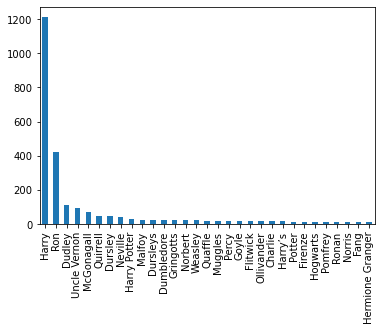

In [22]:
countDF = pd.Series(count.values(),index = count.keys())
countDF[lambda x: x > 10].sort_values(ascending=False).plot(kind = 'bar')

In [110]:
target_character = list(countDF[lambda x: x > 10].index)
# target_character = []

In [111]:
target_character

['Dursley',
 'Dudley',
 'Dursleys',
 'Potter',
 'Harry',
 'McGonagall',
 'Muggles',
 'Dumbledore',
 'Pomfrey',
 'Harry Potter',
 'Uncle Vernon',
 'Harry’s',
 'Hogwarts',
 'Gringotts',
 'Quirrell',
 'Ollivander',
 'Percy',
 'Ron',
 'Charlie',
 'Hermione Granger',
 'Goyle',
 'Malfoy',
 'Weasley',
 'Neville',
 'Norris',
 'Flitwick',
 'Fang',
 'Quaffle',
 'Norbert',
 'Ronan',
 'Firenze']

In [25]:
# characters_cleaned = ['Ronan', 'Dursleys', 'Dumbledore', 'Aunt Petunia', 'Hooch', 'Hedwig',
#        'Crabbe', 'Potter', 'Filch', 'Weasley', 'Fred', 'Hermione',
#        'Hagrid', 'McGonagall', 'Fang', 'Uncle', 'Petunia',
#        'George', 'Uncle Vernon', 'Ron', 'Goyle', 'Quirrell', 'Norbert',
#        'Hermione Granger', 'Pomfrey', 'Percy', 'Harry Potter',
#        'Snape', 'Malfoy', 'Dursley', 'Flitwick', 'Ollivander',
#        'Charlie', 'Harry', 'Dudley']
def filter_characters (characters, ents):
    return [ent for ent in ents if ent in characters]
def replace_names (dictionary,ent):
    if ent in dictionary.keys():
        ent  = dictionary[ent] 
        return ent
    else:
        return ent

In [137]:
# del sent_ents_filtered["Characters_Cleaned"]

In [146]:
sent_ents_filtered.characters

0              [Dursley]
2              [Dursley]
4              [Dursley]
5               [Dudley]
6             [Dursleys]
              ...       
6519    [Harry, Weasley]
6520      [Uncle Vernon]
6523        [Harry, Ron]
6525      [Uncle Vernon]
6527             [Harry]
Name: characters, Length: 2339, dtype: object

In [145]:
# sent_ents_filtered.loc[:,"characters"].apply(lambda x: filter_characters(target_character,x))

0              [Dursley]
2              [Dursley]
4              [Dursley]
5               [Dudley]
6             [Dursleys]
              ...       
6519    [Harry, Weasley]
6520      [Uncle Vernon]
6523        [Harry, Ron]
6525      [Uncle Vernon]
6527             [Harry]
Name: characters, Length: 2339, dtype: object

In [147]:
sent_ents_filtered["Characters_Cleaned"] = sent_ents_filtered["characters"].apply(lambda x: filter_characters(target_character,x))

In [152]:
replacement_dict_book1 = {"Potter":"Harry", 
                          "Harry Potter": "Harry",
                          "Hermione Granger":"Hermione",
                          "Weasley":"Ron","Uncle":"Uncle Vernon", 
                          "Dursley":"Mr or Mrs Dursley", 
                          "Dursleys":"Mr or Mrs Dursley","Harry’s": "Harry"
                         }

sent_ents_filtered["Finished_Characters"] = sent_ents_filtered.Characters_Cleaned.apply(lambda x: [replace_names(replacement_dict_book1,ent) for ent in x])

In [154]:
# for i in sent_ents_filtered["Finished_Characters"]:
#     if "Harry" in i :
#         print(i)

In [69]:
window_size = 5
relationships = []
for i in range(sent_ents_filtered.index[-1]): #get len of dataset len function would work too !!
    end_i = min(i+window_size,sent_ents_filtered.index[-1]) # 以防超出index长度
#     print(end_i)
    char_list = sum((sent_ents_filtered.loc[i:end_i].Finished_Characters),[])
#     print(char_list)
    # 相邻的两个相同的角色不计算
    char_unique = [char_list[i] for i in range(len(char_list)) if (i==0) or char_list[i]!= char_list[i-1]]

    if len (char_unique)> 1:
        for idx, source in enumerate(char_unique[:-1]):
            target = char_unique [idx+1]
            # DiGraph
#             relationships.append({"source" : source, "target" : target})
            # Graph
            if source < target:
                relationships.append({"source" : source, "target" : target})
            else:
                relationships.append({"source" : target, "target" : source})

In [158]:
sent_ents_filtered.loc[0:5].Finished_Characters

0    [Mr or Mrs Dursley]
2    [Mr or Mrs Dursley]
4    [Mr or Mrs Dursley]
5               [Dudley]
Name: Finished_Characters, dtype: object

In [71]:
sum(sent_ents_filtered.loc[0:7].Finished_Characters,[])

['Mr or Mrs Dursley',
 'Mr or Mrs Dursley',
 'Mr or Mrs Dursley',
 'Dudley',
 'Mr or Mrs Dursley']

In [72]:
relationships_df = pd.DataFrame(relationships)
def create_weights(df):
    df["value"] = 1 # we need a 1 as a numerical value since we will group by source target and aggregate it with a sum function
                    #its essential to name this column value otherwise the pyvis visualization wont work
    df = df.groupby(["source","target"], sort = False, as_index = False).sum()
    return df
relationships_df = create_weights(relationships_df)

In [73]:
relationships_df

source             target  value
0       Dudley  Mr or Mrs Dursley     82
1        Harry  Mr or Mrs Dursley    155
2   McGonagall            Muggles     11
3   Dumbledore            Muggles      7
4   McGonagall            Pomfrey      5
..         ...                ...    ...
93  Dumbledore             Malfoy      1
94  Dumbledore            Pomfrey      5
95    Hogwarts              Percy      4
96    Hermione              Percy      1
97         Ron       Uncle Vernon     12

[98 rows x 3 columns]

In [74]:
relationships_df[relationships_df["source"].isin(["Harry", "Dursleys"])]

source             target  value
1   Harry  Mr or Mrs Dursley    155
5   Harry         McGonagall    267
8   Harry            Muggles     58
10  Harry       Uncle Vernon    398
13  Harry           Hogwarts     42
18  Harry           Quirrell    230
21  Harry         Ollivander     98
24  Harry              Percy     57
25  Harry                Ron   2154
29  Harry           Hermione     36
33  Harry             Malfoy    112
43  Harry            Neville    168
47  Harry             Norris     38
65  Harry            Quaffle     44
71  Harry            Pomfrey     35
74  Harry            Norbert     43
84  Harry              Ronan     24

In [75]:
nx_graph = nx.from_pandas_edgelist(relationships_df,
                                  source = "source",
                                  target = "target",
                                  edge_attr = "value"
                                  ) 

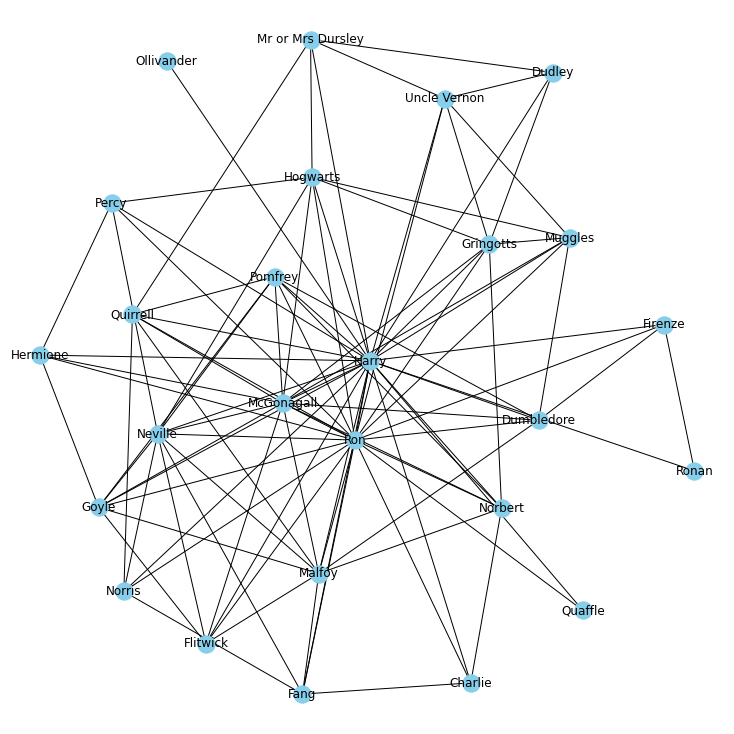

In [76]:
plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(nx_graph)
nx.draw(nx_graph, with_labels=True, node_color = "skyblue",edge_cmap = plt.cm.Blues, pos=layout)
plt.show()

In [77]:
from pyvis.network import Network
network = Network(notebook = True, width = "1000px", height = "700px", bgcolor = "#222222", font_color="white" )
network.from_nx(nx_graph)
network.show("Harry_Potter_Book1.html")

In [159]:
#change nodesize depending on degeree of node (how many edges)
node_degree = dict(nx_graph.degree)
node_degree

{'Dudley': 4,
 'Mr or Mrs Dursley': 5,
 'Harry': 25,
 'McGonagall': 14,
 'Muggles': 7,
 'Dumbledore': 7,
 'Pomfrey': 8,
 'Uncle Vernon': 6,
 'Hogwarts': 8,
 'Gringotts': 8,
 'Quirrell': 7,
 'Ollivander': 1,
 'Percy': 5,
 'Ron': 21,
 'Charlie': 4,
 'Hermione': 5,
 'Goyle': 8,
 'Malfoy': 10,
 'Neville': 11,
 'Norris': 5,
 'Flitwick': 6,
 'Fang': 6,
 'Quaffle': 2,
 'Norbert': 7,
 'Ronan': 2,
 'Firenze': 4}

In [160]:
network = Network(notebook = True, width = "1000px", height = "700px", bgcolor = "#222222", font_color="white" )
nx.set_node_attributes(nx_graph, node_degree, "size")
network.from_nx(nx_graph)

network.show("Harry_Potter_Book1.html")

In [161]:
# import community as community_louvain

import community.community_louvain as community_louvain
communities = community_louvain.best_partition(nx_graph)
communities

{'Dudley': 0,
 'Mr or Mrs Dursley': 0,
 'Harry': 3,
 'McGonagall': 2,
 'Muggles': 0,
 'Dumbledore': 3,
 'Pomfrey': 2,
 'Uncle Vernon': 0,
 'Hogwarts': 0,
 'Gringotts': 0,
 'Quirrell': 1,
 'Ollivander': 3,
 'Percy': 1,
 'Ron': 1,
 'Charlie': 1,
 'Hermione': 1,
 'Goyle': 2,
 'Malfoy': 2,
 'Neville': 2,
 'Norris': 1,
 'Flitwick': 2,
 'Fang': 1,
 'Quaffle': 3,
 'Norbert': 2,
 'Ronan': 3,
 'Firenze': 3}

In [162]:
nx.set_node_attributes(nx_graph, communities, "group")
network = Network(notebook = True, width = "1000px", height = "700px", bgcolor = "#222222", font_color="white" )
network.from_nx(nx_graph)

network.show("Harry_Potter_Book1.html")
#network.save_graph("Harry_Potter_Book1.html")